<a href="https://colab.research.google.com/github/sabhashanki/Data_Augmentation/blob/main/data_augumentation_mysolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import os
import PIL
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import cv2
import matplotlib.pyplot as plt
import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
roses = list(data_dir.glob('roses/*'))

In [ ]:
len(roses)

641

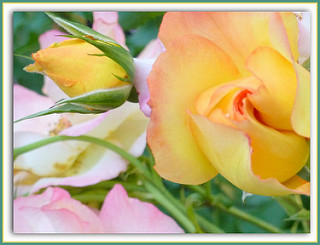

In [ ]:
Image.open(roses[1])

In [ ]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisys' : list(data_dir.glob('daisy/*')),
    'dandelions' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

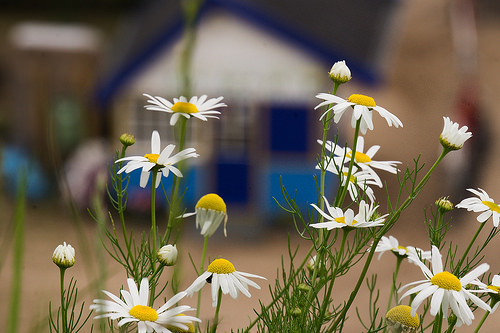

In [ ]:
Image.open(flower_images_dict['daisys'][0])

In [ ]:
flower_images_dict['daisys'][0]

PosixPath('datasets/flower_photos/daisy/20619292635_9857a12d54.jpg')

In [ ]:
str(flower_images_dict['daisys'][0])

'datasets/flower_photos/daisy/20619292635_9857a12d54.jpg'

In [ ]:
cv2.imread(str(flower_images_dict['daisys'][0]))

array([[[  8,  14,  13],
        [  7,  12,  13],
        [  7,  12,  13],
        ...,
        [ 40,  46,  57],
        [ 40,  46,  59],
        [ 39,  45,  58]],

       [[  7,  12,  13],
        [  7,  12,  13],
        [  7,  12,  13],
        ...,
        [ 40,  46,  57],
        [ 40,  46,  57],
        [ 40,  46,  59]],

       [[  7,  12,  13],
        [  7,  12,  13],
        [  6,  11,  12],
        ...,
        [ 40,  46,  57],
        [ 40,  46,  57],
        [ 38,  47,  57]],

       ...,

       [[ 73, 108, 134],
        [ 75, 108, 134],
        [ 73, 109, 133],
        ...,
        [110, 139, 170],
        [110, 138, 169],
        [109, 137, 167]],

       [[ 75, 108, 134],
        [ 76, 109, 135],
        [ 74, 110, 134],
        ...,
        [110, 139, 170],
        [110, 138, 169],
        [112, 138, 168]],

       [[ 76, 109, 135],
        [ 74, 109, 135],
        [ 74, 110, 134],
        ...,
        [110, 138, 169],
        [110, 138, 169],
        [112, 137, 169]]

In [ ]:
img = cv2.imread(str(flower_images_dict['daisys'][0]))

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img, (100,100)).shape

(100, 100, 3)

In [ ]:
flower_labels = {
    'roses':0,
    'daisys':1,
    'dandelions':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
x = []
y = []

for name, image in flower_images_dict.items():
    for i in image:
     img = cv2.imread(str(i))
        resized_img = cv2.resize(img, (100,100))
        x.append(resized_img)
        y.append(flower_labels[name])
        

In [ ]:
y[700:710]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(3670, 100, 100, 3)

In [ ]:
y.shape

(3670,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [ ]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

In [ ]:
xtrain_scaled[0]

array([[[0.05490196, 0.19607843, 0.13333333],
        [0.0627451 , 0.14901961, 0.10196078],
        [0.06666667, 0.1254902 , 0.08627451],
        ...,
        [0.07058824, 0.09411765, 0.09019608],
        [0.07843137, 0.09803922, 0.09411765],
        [0.07058824, 0.09019608, 0.08627451]],

       [[0.0627451 , 0.18431373, 0.12156863],
        [0.05098039, 0.13333333, 0.08235294],
        [0.05098039, 0.10196078, 0.06666667],
        ...,
        [0.0745098 , 0.09803922, 0.09019608],
        [0.08235294, 0.10588235, 0.09411765],
        [0.0745098 , 0.09411765, 0.08627451]],

       [[0.05098039, 0.11764706, 0.0745098 ],
        [0.03921569, 0.07843137, 0.05490196],
        [0.05098039, 0.0745098 , 0.05882353],
        ...,
        [0.0745098 , 0.10196078, 0.09411765],
        [0.0745098 , 0.09411765, 0.08627451],
        [0.0745098 , 0.09411765, 0.08627451]],

       ...,

       [[0.05882353, 0.14117647, 0.09019608],
        [0.03921569, 0.10980392, 0.0627451 ],
        [0.03921569, 0

In [ ]:
xtrain_scaled.shape

(2752, 100, 100, 3)

In [ ]:
ytrain[:5]

array([2, 0, 1, 2, 4])

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 20, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters = 60, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters = 80, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(5)
])
"""
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(xtrain_scaled, ytrain, epochs=30)    

Epoch 1/30
86/86 [==============================] - 2s 11ms/step - loss: 1.3140 - accuracy: 0.4230
Epoch 2/30
86/86 [==============================] - 1s 11ms/step - loss: 1.0733 - accuracy: 0.5680
Epoch 3/30
86/86 [==============================] - 1s 11ms/step - loss: 0.9345 - accuracy: 0.6188
Epoch 4/30
86/86 [==============================] - 1s 10ms/step - loss: 0.7856 - accuracy: 0.6897
Epoch 5/30
86/86 [==============================] - 1s 11ms/step - loss: 0.6613 - accuracy: 0.7518
Epoch 6/30
86/86 [==============================] - 1s 10ms/step - loss: 0.5171 - accuracy: 0.8067
Epoch 7/30
86/86 [==============================] - 1s 11ms/step - loss: 0.3952 - accuracy: 0.8565
Epoch 8/30
86/86 [==============================] - 1s 11ms/step - loss: 0.2750 - accuracy: 0.9052
Epoch 9/30
86/86 [==============================] - 1s 11ms/step - loss: 0.1846 - accuracy: 0.9440
Epoch 10/30
86/86 [==============================] - 1s 10ms/step - loss: 0.1152 - accuracy: 0.9677
Epoch 11/

In [ ]:
model.evaluate(xtest, ytest)

29/29 [==============================] - 0s 9ms/step - loss: 862.0425 - accuracy: 0.5733


[862.04248046875, 0.5732758641242981]

In [ ]:
data_augumentation = keras.Sequential([
      keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      keras.layers.experimental.preprocessing.RandomRotation(0.1),
      keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model = keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(filters = 20, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters = 60, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters = 80, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(5)
])
"""
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(xtrain_scaled, ytrain, epochs=30)    

Epoch 1/30
86/86 [==============================] - 3s 12ms/step - loss: 1.3009 - accuracy: 0.4430
Epoch 2/30
86/86 [==============================] - 1s 11ms/step - loss: 1.0838 - accuracy: 0.5661
Epoch 3/30
86/86 [==============================] - 1s 11ms/step - loss: 0.9895 - accuracy: 0.6137
Epoch 4/30
86/86 [==============================] - 1s 11ms/step - loss: 0.9066 - accuracy: 0.6355
Epoch 5/30
86/86 [==============================] - 1s 11ms/step - loss: 0.8638 - accuracy: 0.6573
Epoch 6/30
86/86 [==============================] - 1s 11ms/step - loss: 0.7963 - accuracy: 0.6908
Epoch 7/30
86/86 [==============================] - 1s 11ms/step - loss: 0.7325 - accuracy: 0.7231
Epoch 8/30
86/86 [==============================] - 1s 11ms/step - loss: 0.7174 - accuracy: 0.7217
Epoch 9/30
86/86 [==============================] - 1s 11ms/step - loss: 0.6613 - accuracy: 0.7478
Epoch 10/30
86/86 [==============================] - 1s 11ms/step - loss: 0.6399 - accuracy: 0.7576
Epoch 11/

In [ ]:
model.evaluate(xtest, ytest)

29/29 [==============================] - 0s 6ms/step - loss: 302.4254 - accuracy: 0.6340


[302.4254455566406, 0.6339869499206543]